# Homework 1 - Sonja Jolanda Klein
## UNGA_SPEECHES.csv
1. Find top 10 most common nouns of all speeches within the file.
(top 10 most common nouns of the entire csv file, not individual countries)

In [795]:
import nltk

nltk.download('stopwords')  #
nltk.download('averaged_perceptron_tagger')

import pandas as pd
from nltk.corpus import stopwords
import re

from collections import Counter

nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sonja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sonja\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sonja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sonja\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [796]:
df = pd.read_csv(r'UNGA_speeches.csv', nrows=3000, encoding='cp949')
stop_words = stopwords.words('english')
words = []


def preprocess_statements(statement):
    statement = re.sub(r'[^A-Za-z]', ' ', statement)
    statement = " ".join(word.lower() for word in statement.split() if word.lower() not in stop_words)
    return statement


df['processed_STATEMENT'] = df['STATEMENT'].apply(lambda x: preprocess_statements(x))
df

,COUNTRY,STATEMENT,processed_STATEMENT
0,United Kingdom,"Mr President, your excellencies, ladies and ge...",mr president excellencies ladies gentlemen tim...
1,EU,In Senegal last December I met passionate doct...,senegal last december met passionate doctors r...
2,South Korea,"Mr. President,\nMr. Secretary General,\nDistin...",mr president mr secretary general distinguishe...
3,Ukraine,Greetings to all people of the world who value...,greetings people world value peace unity diffe...
4,France,"President of the General Assembly,\nUnder-Secr...",president general assembly secretary general u...
5,Indonesia,"Mr. President, \n\nMany Leaders have spoken he...",mr president many leaders spoken past days sha...
6,US,"Mr. President, Mr. Secretary-General, my fello...",mr president mr secretary general fellow leade...


In [797]:
words = []
for sentence in df['processed_STATEMENT']:
    for word in sentence.split():
        words.append(word)

# words
# ToDo tokenization and lemmatization or stemming

In [798]:
# get the nouns
nouns = [word for word, pos in nltk.pos_tag(words) if pos in ['NN']]
# nouns

In [799]:
#counter = Counter(nouns)
#counter.most_common(10)

wnl = WordNetLemmatizer()

nouns_lemmatized = []
for noun in nouns:
    nouns_lemmatized.append((wnl.lemmatize(noun, pos='n')))
# nouns_lemmatized

In [800]:
freq_nouns = nltk.FreqDist(nouns_lemmatized)
freq_nouns.most_common(10)

[('world', 110),
 ('war', 92),
 ('peace', 73),
 ('security', 65),
 ('russia', 45),
 ('today', 38),
 ('food', 33),
 ('support', 31),
 ('state', 30),
 ('energy', 29)]

2. Make word cloud for four country of your choice based on word frequency.
- If you want to specifically add countries, you can do that.
- Just add them to your csv file before importing

In [801]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [802]:
def make_word_cloud(data, country):
    data_freq = nltk.FreqDist(data.split())
    wc = WordCloud(width=800, height=500, min_font_size=8, max_font_size=200, background_color='white',
                   colormap='plasma')
    plt.imshow(wc.generate_from_frequencies(data_freq), interpolation='bilinear')
    plt.axis('off')
    plt.show()
    wc.to_file((country + '.png'))

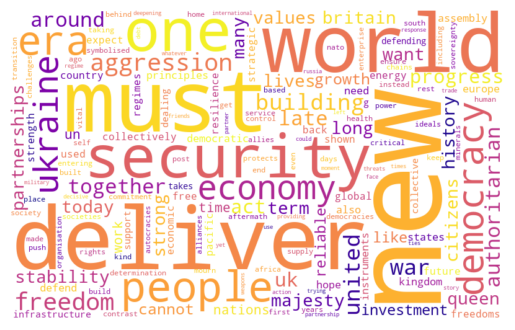

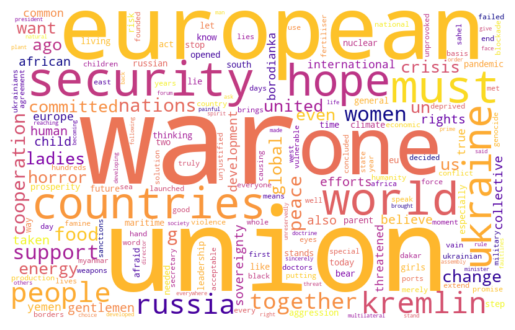

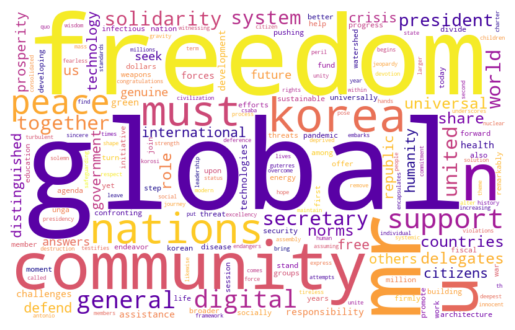

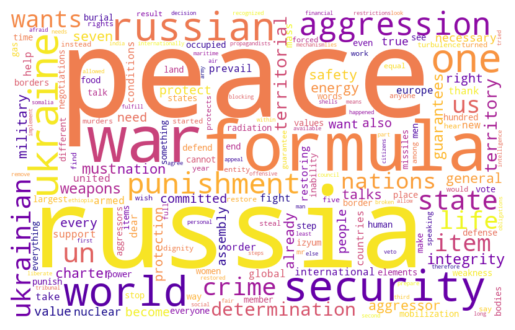

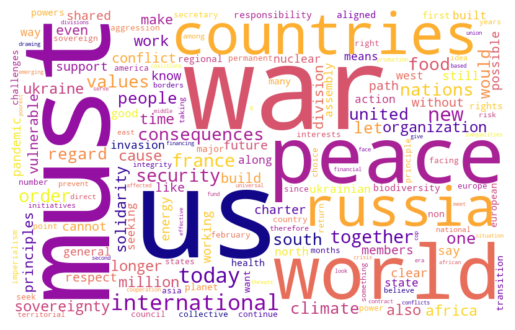

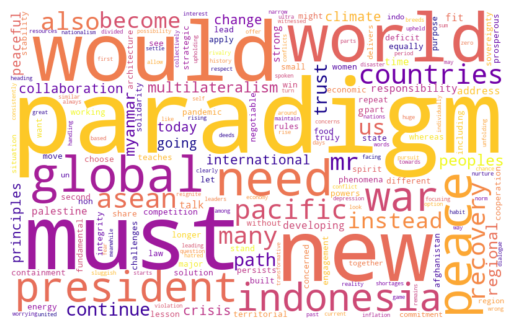

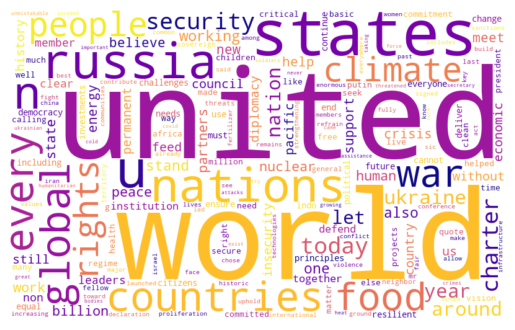

In [803]:
for i, row in df.iterrows():
    make_word_cloud(row['processed_STATEMENT'], row['COUNTRY'])

In [804]:
south_korea_freq = nltk.FreqDist(df.processed_STATEMENT[2].split())
#make_word_cloud(south_korea_freq, "South_Korea")

In [805]:
ukraine_freq = nltk.FreqDist(df.processed_STATEMENT[3].split())
#make_word_cloud(ukraine_freq, "Ukraine")

In [806]:
france_freq = nltk.FreqDist(df.processed_STATEMENT[4].split())
#make_word_cloud(france_freq, "France")

In [807]:
united_states_freq = nltk.FreqDist(df.processed_STATEMENT[6].split())
#make_word_cloud(united_states_freq, "US")

3. Measure polarity & subjectivity scores for each country using TextBlob.

In [808]:
for i, row in df.iterrows():
    sentiment = TextBlob(row['STATEMENT']).sentiment
    print(f"{row['COUNTRY']} -> subj.: {sentiment.subjectivity}, pol.: {sentiment.polarity}")

United Kingdom -> subj.: 0.4609002412518037, pol.: 0.11847188401875904
EU -> subj.: 0.36940346970649984, pol.: 0.046901500575743
South Korea -> subj.: 0.29654680053839716, pol.: 0.12252491905853252
Ukraine -> subj.: 0.42208097189981275, pol.: 0.052193403379572983
France -> subj.: 0.4040802764486971, pol.: 0.07326207564365461
Indonesia -> subj.: 0.38946042053184887, pol.: 0.09831941867656156
US -> subj.: 0.4522268819143817, pol.: 0.1332463899911816


4. Hand in two files by the deadline (November 17th, 1pm.)
a. the ipynb file
b. a word file with your four word clouds

In [809]:
# the word u.n. is now a u and a n i think!!